In [2]:
import pandas as pd

df = pd.read_parquet("arcos_processed.parquet")
df.head()

,BUYER_STATE,BUYER_COUNTY,YEAR,TOTAL_MME
0,GA,APPLING,2015,5201.267675
1,GA,APPLING,2016,1550.012791
2,GA,APPLING,2019,4599.053692
3,GA,ATKINSON,2015,1023.390277
4,GA,ATKINSON,2016,236.085915


In [3]:
fl = df[df["BUYER_STATE"] == "FL"]
fl["TOTAL_MME"].describe()

count    4.046600e+04
mean     6.288492e+07
std      1.971026e+09
min      6.408900e-05
25%      3.245044e+02
50%      1.844003e+03
75%      7.754332e+03
max      1.701798e+11
Name: TOTAL_MME, dtype: float64

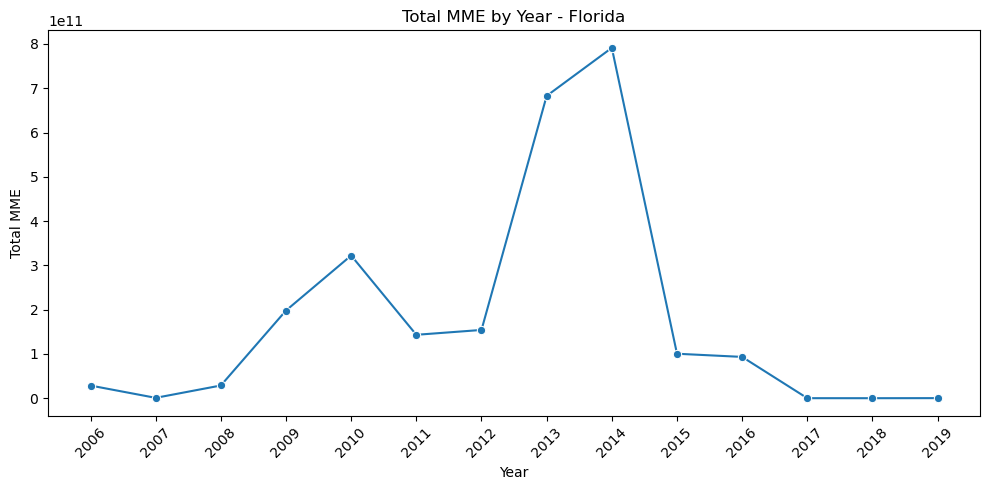

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize total MME by year
yearly_trend = fl.groupby("YEAR", as_index=False)["TOTAL_MME"].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x="YEAR", y="TOTAL_MME", marker="o")

# Force every year label to appear
plt.xticks(
    ticks=yearly_trend["YEAR"].unique(),
    labels=yearly_trend["YEAR"].unique(),
    rotation=45,
)  # optional rotation for readability

plt.title("Total MME by Year - Florida")
plt.xlabel("Year")
plt.ylabel("Total MME")
plt.tight_layout()
plt.show()

In [5]:
yearly_trend

,YEAR,TOTAL_MME
0,2006,2.866447e+10
1,2007,9.030858e+08
2,2008,2.878728e+10
3,2009,1.981194e+11
4,2010,3.222911e+11
5,2011,1.432725e+11
6,2012,1.542398e+11
7,2013,6.827899e+11
8,2014,7.912663e+11
9,2015,1.005109e+11


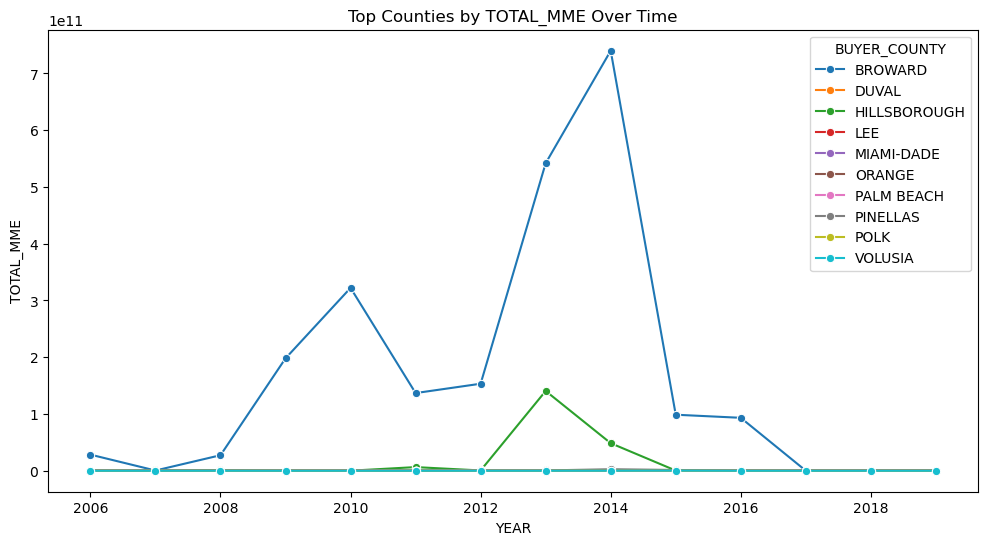

In [6]:
county_year = fl.groupby(["BUYER_COUNTY", "YEAR"])["TOTAL_MME"].sum().reset_index()

# Optionally visualize top high-MME counties
top_counties = (
    county_year.groupby("BUYER_COUNTY")["TOTAL_MME"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_data = county_year[county_year["BUYER_COUNTY"].isin(top_counties)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_data, x="YEAR", y="TOTAL_MME", hue="BUYER_COUNTY", marker="o")
plt.title("Top Counties by TOTAL_MME Over Time")
plt.show()

In [17]:
fl_counties = (
    fl[fl["BUYER_COUNTY"].isin(top_counties)]
    .groupby(["BUYER_COUNTY", "YEAR"], as_index=False)["TOTAL_MME"]
    .sum()
    .sort_values(by="TOTAL_MME", ascending=False)
)

fl_counties.sort_values(["TOTAL_MME"], ascending=False).head(15)

,BUYER_COUNTY,YEAR,TOTAL_MME
8,BROWARD,2014,7.400370e+11
7,BROWARD,2013,5.417877e+11
4,BROWARD,2010,3.221483e+11
3,BROWARD,2009,1.980256e+11
6,BROWARD,2012,1.532883e+11
35,HILLSBOROUGH,2013,1.405075e+11
5,BROWARD,2011,1.368151e+11
9,BROWARD,2015,9.867772e+10
10,BROWARD,2016,9.323273e+10
36,HILLSBOROUGH,2014,4.850636e+10
